In [441]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [442]:
file_name = 'data/imported_data.csv'
df = pd.read_csv(file_name)

In [443]:
df

X          Y         Z   R    G    B  Intensity  \
0        9.439534  14.376236 -1.146688  41   46   49          4   
1        9.440045  14.074572 -1.174907  54   59   62          8   
2        9.443962  14.200837 -1.156712  46   51   54          6   
3        9.443726  14.381617 -1.186532  52   60   63         11   
4        9.419093  14.092623 -1.110571  58   64   64         12   
...           ...        ...       ...  ..  ...  ...        ...   
425418 -13.667930  -7.809042 -1.051000  64  202  122         24   
425419 -13.669897  -7.763073 -1.050626  64  202  122         20   
425420 -13.651345  -7.822357 -1.051755  64  202  122          8   
425421 -13.668946  -7.832104 -1.050694  64  202  122         22   
425422 -13.657827  -7.787619 -1.053248  64  202  122          6   

        Original_cloud_index  Illuminance_(PCV)  Classification        Nx  \
0                          0           0.648305             NaN -0.777440   
1                          0           0.533898             NaN -0.919458   
2                          0           0.504237             NaN -0.849193   
3                          0           0.572034             NaN -0.591658   
4                          0           0.885593             NaN -0.437266   
...                      ...                ...             ...       ...   
425418                     2           0.919492             NaN  0.195947   
425419                     2           0.995763             NaN  0.255349   
425420                     2           0.915254             NaN  0.232615   
425421                     2           0.927966             NaN  0.398272   
425422                     2           1.000000             NaN  0.193061   

              Ny        Nz  
0      -0.058486 -0.626232  
1       0.022171 -0.392563  
2      -0.031655 -0.527133  
3      -0.106645  0.799104  
4       0.001305  0.899331  
...          ...       ...  
425418  0.041564 -0.979733  
425419  0.043175 -0.965885  
425420 -0.136450 -0.962949  
425421 -0.011676 -0.917193  
425422  0.127445 -0.972875  

[425423 rows x 13 columns]

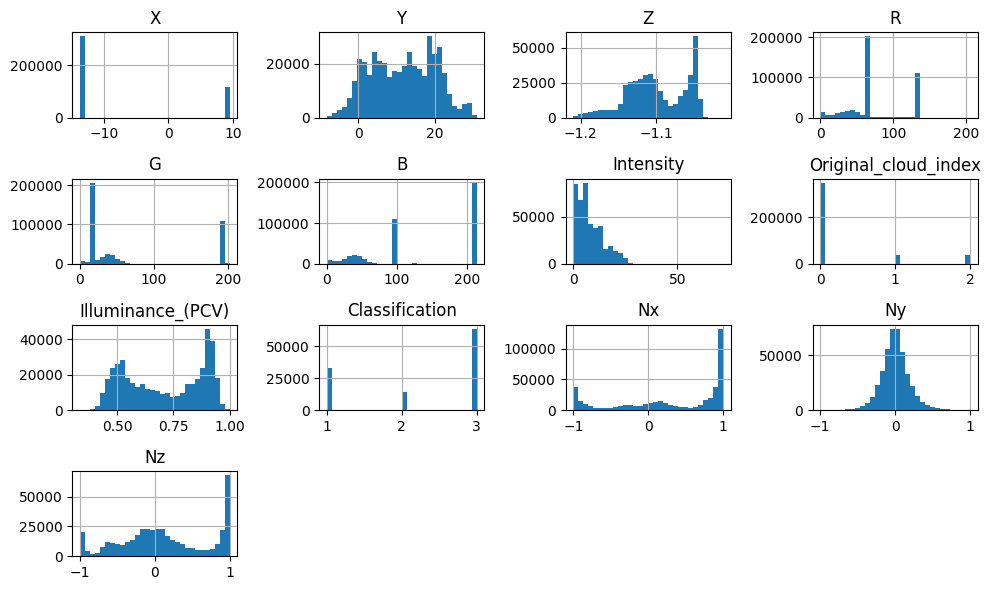

In [444]:
# Histograms for each column
df.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [445]:
# convert from meters to feet
df[['lateral', 'axial', 'vertical']] = df[['X', 'Y', 'Z']] * 3.28084

In [446]:
df['vertical'] = df['vertical'] - df['vertical'].min() # set min to 0
df['axial'] = df['axial'] - df['axial'].min() # set min to 0

In [447]:
df[['lateral_inch', 'axial_inch', 'vertical_inch']] = df[['lateral', 'axial', 'vertical']] * 12 # convert to inches

In [448]:
df[['lateral_inch_round', 'axial_inch_round', 'vertical_inch_round']] = df[['lateral_inch', 'axial_inch', 'vertical_inch']].apply(
    lambda col: col.map(lambda x: round(x * 16) / 16))

In [449]:
drop_cols = ['X', 'Y', 'Z', 'R', 'B', 'G', 'Nx', 'Ny', 'Nz']
df = df.drop(columns=drop_cols)

In [450]:
#df.drop(columns=['Illuminance_(PCV)'], inplace=True)

In [451]:
df.rename(columns={'Illuminance_(PCV)': 'PCV'}, inplace=True)

In [452]:
df

Intensity  Original_cloud_index       PCV  Classification    lateral  \
0               4                     0  0.648305             NaN  30.969601   
1               8                     0  0.533898             NaN  30.971278   
2               6                     0  0.504237             NaN  30.984129   
3              11                     0  0.572034             NaN  30.983353   
4              12                     0  0.885593             NaN  30.902538   
...           ...                   ...       ...             ...        ...   
425418         24                     2  0.919492             NaN -44.842290   
425419         20                     2  0.995763             NaN -44.848745   
425420          8                     2  0.915254             NaN -44.787880   
425421         22                     2  0.927966             NaN -44.845626   
425422          6                     2  1.000000             NaN -44.809146   

            axial  vertical  lateral_inch  axial_inch  vertical_inch  \
0       73.969852  0.207422    371.635216  887.638218       2.489062   
1       72.980139  0.114840    371.655341  875.761669       1.378078   
2       73.394396  0.174534    371.809543  880.732753       2.094413   
3       73.987505  0.076702    371.800232  887.850054       0.920427   
4       73.039362  0.325916    370.830450  876.472344       3.910989   
...           ...       ...           ...         ...            ...   
425418   1.183504  0.521360   -538.107484   14.202051       6.256319   
425419   1.334321  0.522586   -538.184942   16.011854       6.271028   
425420   1.139819  0.518884   -537.454555   13.677830       6.226606   
425421   1.107842  0.522365   -538.147508   13.294108       6.268381   
425422   1.253791  0.513984   -537.709757   15.045489       6.167804   

        lateral_inch_round  axial_inch_round  vertical_inch_round  
0                 371.6250          887.6250               2.5000  
1                 371.6250          875.7500               1.3750  
2                 371.8125          880.7500               2.1250  
3                 371.8125          887.8750               0.9375  
4                 370.8125          876.5000               3.9375  
...                    ...               ...                  ...  
425418           -538.1250           14.1875               6.2500  
425419           -538.1875           16.0000               6.2500  
425420           -537.4375           13.6875               6.2500  
425421           -538.1250           13.3125               6.2500  
425422           -537.6875           15.0625               6.1875  

[425423 rows x 13 columns]

In [453]:
df.describe()

Intensity  Original_cloud_index            PCV  Classification  \
count  425423.000000         425423.000000  425423.000000   109970.000000   
mean        7.964567              0.276748       0.708961        2.280340   
std         6.197848              0.620208       0.174922        0.891541   
min         0.000000              0.000000       0.334746        1.000000   
25%         3.000000              0.000000       0.533898        1.000000   
50%         6.000000              0.000000       0.707627        3.000000   
75%        11.000000              0.000000       0.889831        3.000000   
max        72.000000              2.000000       1.000000        3.000000   

             lateral          axial       vertical   lateral_inch  \
count  425423.000000  425423.000000  425423.000000  425423.000000   
mean      -24.266292      64.641068       0.363633    -291.195504   
std        33.646338      27.313790       0.130202     403.756056   
min       -44.925005       0.000000       0.000000    -539.100056   
25%       -44.771256      41.092858       0.271056    -537.255072   
50%       -44.740684      65.848360       0.350388    -536.888207   
75%        30.923817      87.952097       0.496063     371.085802   
max        31.178737     127.864617       0.654076     374.144844   

          axial_inch  vertical_inch  lateral_inch_round  axial_inch_round  \
count  425423.000000  425423.000000       425423.000000     425423.000000   
mean      775.692821       4.363595         -291.195583        775.692843   
std       327.765481       1.562421          403.756108        327.765468   
min         0.000000       0.000000         -539.125000          0.000000   
25%       493.114292       3.252668         -537.250000        493.125000   
50%       790.180322       4.204662         -536.875000        790.187500   
75%      1055.425167       5.952760          371.062500       1055.437500   
max      1534.375405       7.848909          374.125000       1534.375000   

       vertical_inch_round  
count        425423.000000  
mean              4.363623  
std               1.562531  
min               0.000000  
25%               3.250000  
50%               4.187500  
75%               5.937500  
max               7.875000

In [454]:
floor_to_rail_top_nom = 25.5 # feet
floor_to_rail_top_nom_inch = floor_to_rail_top_nom * 12 # inches
span_nom = 75.75 # feet
span_nom_inch = span_nom * 12 # inches
rail_height = 5 # inches

In [455]:
# Create binary flags
df['is_rail_a'] = (df['lateral'] < 0).astype(int)  
df['is_rail_b'] = (df['lateral'] >= 0).astype(int)
df[['is_rail_a', 'is_rail_b']].sum()

is_rail_a    310339
is_rail_b    115084
dtype: int64

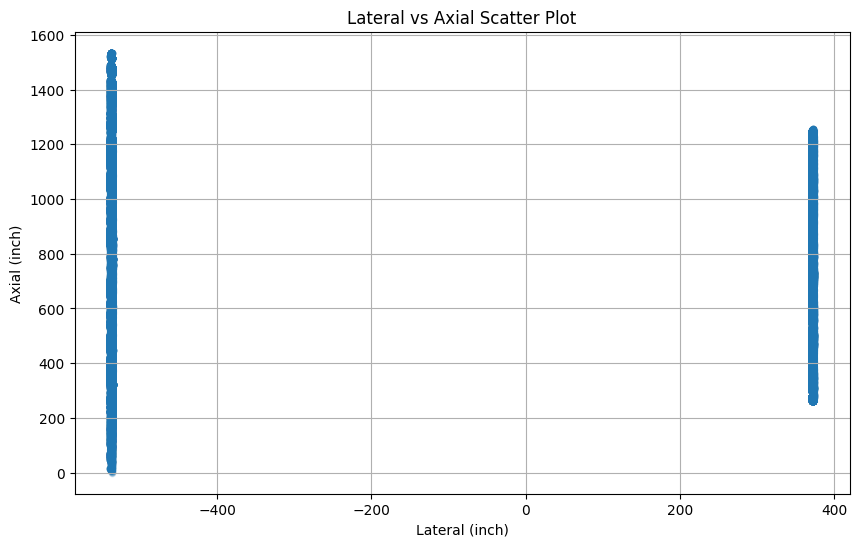

In [456]:
scatter = df.plot.scatter(x='lateral_inch', y='axial_inch', alpha=0.1, figsize=(10, 6))
plt.title('Lateral vs Axial Scatter Plot')
plt.xlabel('Lateral (inch)')
plt.ylabel('Axial (inch)')
plt.grid(True)
plt.show()

In [457]:

# Compute axial bounds for right rail
rmin, rmax = df.loc[df['is_rail_b'] == 1, 'axial_inch'].agg(['min', 'max'])

# Keep all non-left rows OR left rows within [rmin, rmax]
df = df[
    (df['is_rail_a'] == 0) | 
    df['axial_inch'].between(rmin, rmax, inclusive='both')
].copy()

print(f"Right rail axial range: [{rmin:.6f}, {rmax:.6f}]")
print(f"Rows after truncation: {len(df)}")

Right rail axial range: [260.230147, 1257.513605]
Rows after truncation: 384607


In [458]:
df[['is_rail_a', 'is_rail_b']].sum()

is_rail_a    269523
is_rail_b    115084
dtype: int64

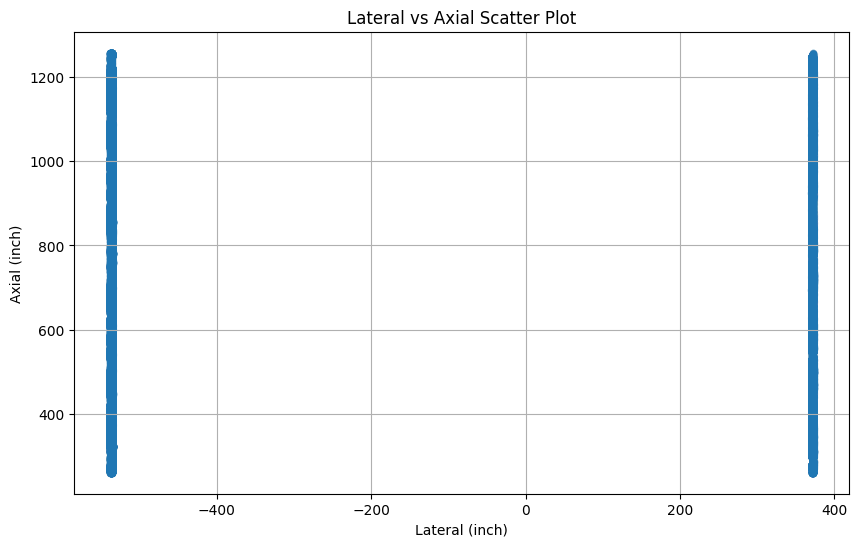

In [459]:
scatter = df.plot.scatter(x='lateral_inch', y='axial_inch', alpha=0.1, figsize=(10, 6))
plt.title('Lateral vs Axial Scatter Plot')
plt.xlabel('Lateral (inch)')
plt.ylabel('Axial (inch)')
plt.grid(True)
plt.show()

In [460]:

def rail_profiles_scatter_plot(df, x1='lateral_inch', y1='vertical_inch', x2='axial_inch', y2='lateral_inch'):
    # Split the dataframe into Rail A and Rail B
    dfa_temp = df[df['is_rail_a'] == 1]
    dfb_temp = df[df['is_rail_b'] == 1]

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Rail A Vertical Profile
    axs[0, 0].scatter(dfa_temp[x1], dfa_temp[y1], s=1, alpha=0.1)
    axs[0, 0].set_title('Rail A')
    axs[0, 0].set_xlabel(x1)
    axs[0, 0].set_ylabel(y1)
    axs[0, 0].grid(True)

    # Plot Rail A Axial Profile
    axs[0, 1].scatter(dfa_temp[x2], dfa_temp[y2], s=1, alpha=0.1)
    axs[0, 1].set_title('Rail A')
    axs[0, 1].set_xlabel(x2)
    axs[0, 1].set_ylabel(y2)
    axs[0, 1].grid(True)

    # Plot Rail B Vertical Profile
    axs[1, 0].scatter(dfb_temp[x1], dfb_temp[y1], s=1, alpha=0.1)
    axs[1, 0].set_title('Rail B')
    axs[1, 0].set_xlabel(x1)
    axs[1, 0].set_ylabel(y1)
    axs[1, 0].grid(True)

    # Plot Rail B Axial Profile
    axs[1, 1].scatter(dfb_temp[x2], dfb_temp[y2], s=1, alpha=0.1)
    axs[1, 1].set_title('Rail B')
    axs[1, 1].set_xlabel(x2)
    axs[1, 1].set_ylabel(y2)
    axs[1, 1].grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


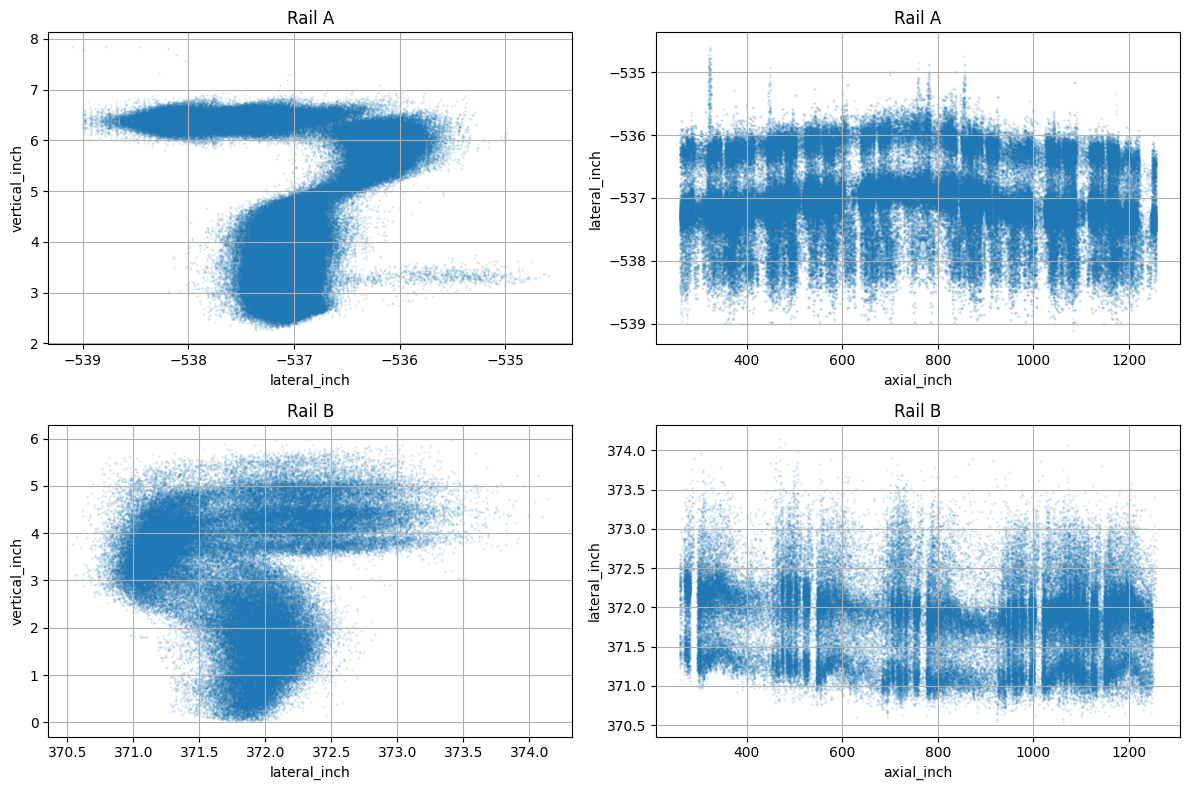

In [461]:
rail_profiles_scatter_plot(df, x1='lateral_inch', y1='vertical_inch', x2='axial_inch', y2='lateral_inch')

In [462]:
import numpy as np
import pandas as pd

# =========================
# Tunable parameters
# =========================
crown_band_in   = 0.35     # half-width of lateral crown band (in)
window_in       = 12.0    # axial window length for rolling quantile (in) ~ 10 ft
step_in         = 6.0     # stride between window centers (in)
q_top           = 0.99     # robust "top" inside the window (99th percentile)
min_pts_window  = 5       # require at least this many points in a window to accept it
smooth_win      = 7        # odd number; rolling-median smooth on the q99 curve

# Masks & lateral centers
maskL = df['is_rail_a'] == 1
maskR = df['is_rail_b'] == 1
if not maskL.any() or not maskR.any():
    raise ValueError("Need is_rail_a / is_rail_b flags precomputed.")

cenL = df.loc[maskL, 'lateral_inch'].median()
cenR = df.loc[maskR, 'lateral_inch'].median()

axmin, axmax = df['axial_inch'].min(), df['axial_inch'].max()
centers = np.arange(axmin + window_in/2, axmax - window_in/2 + 1e-9, step_in)

def rolling_top_curve(df, rail_mask, lateral_center):
    rows = []
    for cx in centers:
        wmask = (
            rail_mask
            & (df['axial_inch'] >= cx - window_in/2)
            & (df['axial_inch'] <  cx + window_in/2)
            & (np.abs(df['lateral_inch'] - lateral_center) <= crown_band_in)
        )
        if wmask.sum() < min_pts_window:
            continue
        qv = df.loc[wmask, 'vertical_inch'].quantile(q_top)
        rows.append((cx, qv))
    curve = pd.DataFrame(rows, columns=['cx', 'q'])
    if curve.empty:
        return curve
    # Smooth the top curve to reduce jitter from sampling
    if len(curve) >= smooth_win:
        curve['q_s'] = curve['q'].rolling(smooth_win, min_periods=1, center=True).median()
    else:
        curve['q_s'] = curve['q']
    return curve

# Build per-rail rolling top curves
curveL = rolling_top_curve(df, maskL, cenL)
curveR = rolling_top_curve(df, maskR, cenR)
if curveL.empty or curveR.empty:
    raise ValueError("Top curve could not be computed for one or both rails. Relax band, window, or min_pts_window.")

# Interpolate the reference (q99_smooth) to each point on its rail
refL = np.interp(df.loc[maskL, 'axial_inch'], curveL['cx'], curveL['q_s'])
refR = np.interp(df.loc[maskR, 'axial_inch'], curveR['cx'], curveR['q_s'])

# Create relative vertical by subtracting the local top curve (per rail)
df['vertical_inch_rel'] = df['vertical_inch']
df.loc[maskL, 'vertical_inch_rel'] -= refL
df.loc[maskR, 'vertical_inch_rel'] -= refR

# (Optional) For non-rail points, subtract the average of both rail top curves at that axial
if (~(maskL | maskR)).any():
    # Interpolate both curves across all rows
    all_refL = np.interp(df['axial_inch'], curveL['cx'], curveL['q_s'])
    all_refR = np.interp(df['axial_inch'], curveR['cx'], curveR['q_s'])
    avg_ref = 0.5 * (all_refL + all_refR)
    df.loc[~(maskL | maskR), 'vertical_inch_rel'] = df.loc[~(maskL | maskR), 'vertical_inch'] - avg_ref

# Diagnostics: 99th percentile should be ~0 in crown bands
def residual_q(mask, center):
    use = mask & (np.abs(df['lateral_inch'] - center) <= crown_band_in)
    if use.sum() == 0:
        return np.nan
    return float(df.loc[use, 'vertical_inch_rel'].quantile(0.99))

rqL = residual_q(maskL, cenL)
rqR = residual_q(maskR, cenR)
print(f"Residual q{int(q_top*100)} in crown — left: {rqL:+.4f} in, right: {rqR:+.4f} in (should be near 0)")


Residual q99 in crown — left: +0.0038 in, right: +0.0036 in (should be near 0)


In [463]:
df

Intensity  Original_cloud_index       PCV  Classification    lateral  \
0               4                     0  0.648305             NaN  30.969601   
1               8                     0  0.533898             NaN  30.971278   
2               6                     0  0.504237             NaN  30.984129   
3              11                     0  0.572034             NaN  30.983353   
4              12                     0  0.885593             NaN  30.902538   
...           ...                   ...       ...             ...        ...   
425014          3                     2  0.889831             NaN -44.816390   
425015          7                     2  0.957627             NaN -44.818952   
425016          8                     2  0.906780             NaN -44.825701   
425017          1                     2  0.911017             NaN -44.799569   
425019          8                     2  0.970339             NaN -44.822153   

             axial  vertical  lateral_inch   axial_inch  vertical_inch  \
0        73.969852  0.207422    371.635216   887.638218       2.489062   
1        72.980139  0.114840    371.655341   875.761669       1.378078   
2        73.394396  0.174534    371.809543   880.732753       2.094413   
3        73.987505  0.076702    371.800232   887.850054       0.920427   
4        73.039362  0.325916    370.830450   876.472344       3.910989   
...            ...       ...           ...          ...            ...   
425014  101.593367  0.526926   -537.796676  1219.120403       6.323110   
425015  102.850671  0.520461   -537.827426  1234.208056       6.245534   
425016  101.852361  0.523527   -537.908414  1222.228330       6.282330   
425017  101.856541  0.520309   -537.594827  1222.278491       6.243713   
425019  102.939237  0.522580   -537.865836  1235.270840       6.270962   

        lateral_inch_round  axial_inch_round  vertical_inch_round  is_rail_a  \
0                 371.6250          887.6250               2.5000          0   
1                 371.6250          875.7500               1.3750          0   
2                 371.8125          880.7500               2.1250          0   
3                 371.8125          887.8750               0.9375          0   
4                 370.8125          876.5000               3.9375          0   
...                    ...               ...                  ...        ...   
425014           -537.8125         1219.1250               6.3125          1   
425015           -537.8125         1234.1875               6.2500          1   
425016           -537.9375         1222.2500               6.3125          1   
425017           -537.6250         1222.2500               6.2500          1   
425019           -537.8750         1235.2500               6.2500          1   

        is_rail_b  vertical_inch_rel  
0               1          -1.636106  
1               1          -2.724316  
2               1          -2.016024  
3               1          -3.205152  
4               1          -0.192049  
...           ...                ...  
425014          0          -0.281820  
425015          0          -0.330203  
425016          0          -0.322600  
425017          0          -0.361216  
425019          0          -0.304004  

[384607 rows x 16 columns]

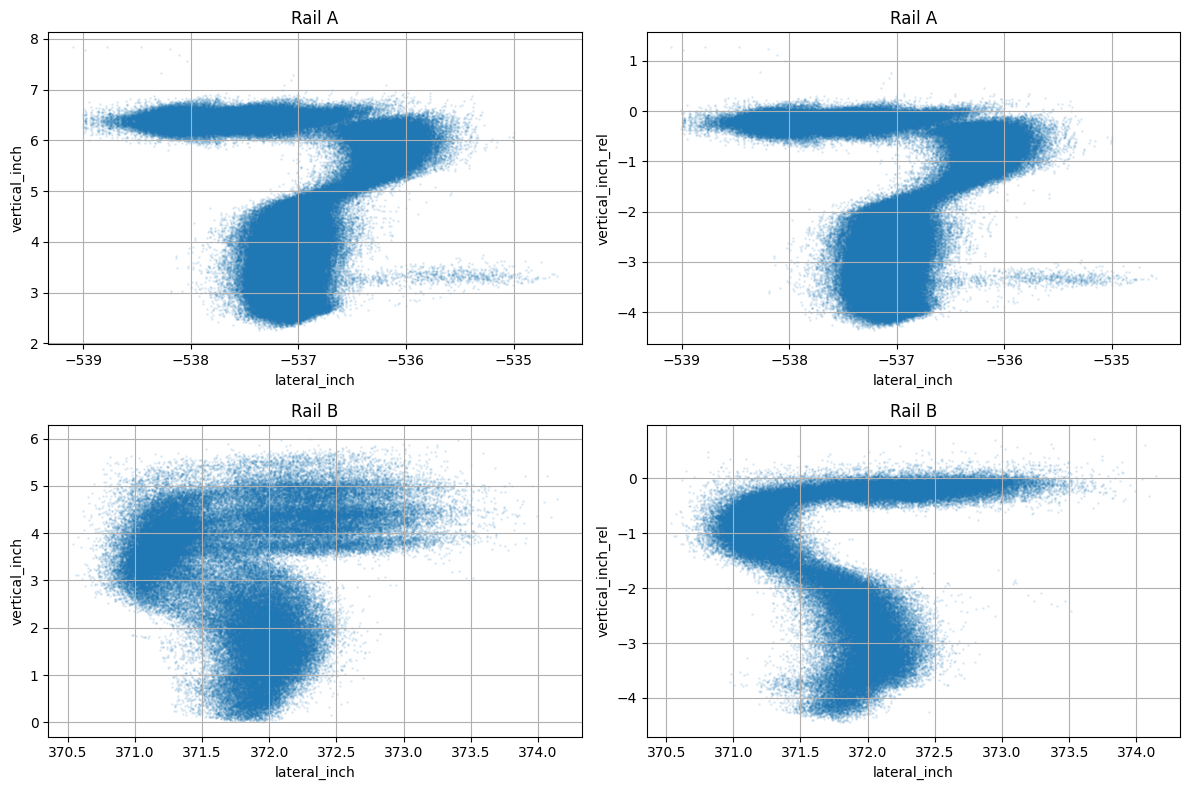

In [464]:
rail_profiles_scatter_plot(df, x1='lateral_inch', y1='vertical_inch', x2='lateral_inch', y2='vertical_inch_rel')

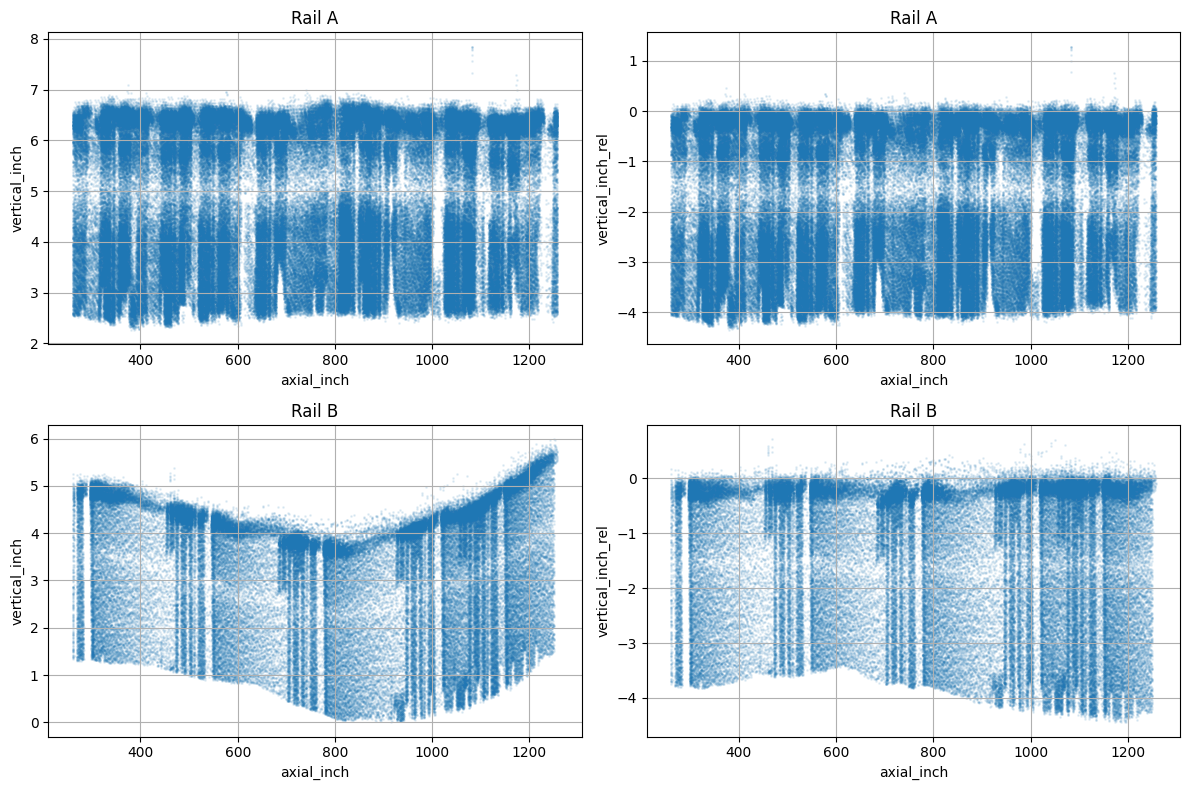

In [465]:
rail_profiles_scatter_plot(df, x1='axial_inch', y1='vertical_inch', x2='axial_inch', y2='vertical_inch_rel')

In [466]:
import numpy as np
import pandas as pd

# =========================
# Tunable parameters
# =========================
side_band_in   = 0.25     # half-width of band (in)
window_in       = 12.0    # axial window length for rolling quantile (in) ~ 10 ft
step_in         = 6.0     # stride between window centers (in)
q_top           = 0.99     # robust "top" inside the window (99th percentile)
min_pts_window  = 5       # require at least this many points in a window to accept it
smooth_win      = 7        # odd number; rolling-median smooth on the q99 curve

# Masks & lateral centers
maskL = df['is_rail_a'] == 1
maskR = df['is_rail_b'] == 1

cenL = df.loc[maskL, 'vertical_inch_rel'].median()
cenR = df.loc[maskR, 'vertical_inch_rel'].median()

axmin, axmax = df['axial_inch'].min(), df['axial_inch'].max()
centers = np.arange(axmin + window_in/2, axmax - window_in/2 + 1e-9, step_in)

def rolling_top_curve(df, rail_mask, lateral_center):
    rows = []
    for cx in centers:
        wmask = (
            rail_mask
            & (df['axial_inch'] >= cx - window_in/2)
            & (df['axial_inch'] <  cx + window_in/2)
            & (np.abs(df['vertical_inch_rel'] - lateral_center) <= side_band_in)
        )
        if wmask.sum() < min_pts_window:
            continue
        qv = df.loc[wmask, 'lateral_inch'].quantile(q_top)
        rows.append((cx, qv))
    curve = pd.DataFrame(rows, columns=['cx', 'q'])
    if curve.empty:
        return curve
    # Smooth the top curve to reduce jitter from sampling
    if len(curve) >= smooth_win:
        curve['q_s'] = curve['q'].rolling(smooth_win, min_periods=1, center=True).median()
    else:
        curve['q_s'] = curve['q']
    return curve

# Build per-rail rolling top curves
curveL = rolling_top_curve(df, maskL, cenL)
curveR = rolling_top_curve(df, maskR, cenR)
if curveL.empty or curveR.empty:
    raise ValueError("Top curve could not be computed for one or both rails. Relax band, window, or min_pts_window.")

# Interpolate the reference (q99_smooth) to each point on its rail
refL = np.interp(df.loc[maskL, 'axial_inch'], curveL['cx'], curveL['q_s'])
refR = np.interp(df.loc[maskR, 'axial_inch'], curveR['cx'], curveR['q_s'])

# Create relative vertical by subtracting the local top curve (per rail)
df['lateral_inch_rel'] = df['lateral_inch']
df.loc[maskL, 'lateral_inch_rel'] -= refL
df.loc[maskR, 'lateral_inch_rel'] -= refR

# (Optional) For non-rail points, subtract the average of both rail top curves at that axial
if (~(maskL | maskR)).any():
    # Interpolate both curves across all rows
    all_refL = np.interp(df['axial_inch'], curveL['cx'], curveL['q_s'])
    all_refR = np.interp(df['axial_inch'], curveR['cx'], curveR['q_s'])
    avg_ref = 0.5 * (all_refL + all_refR)
    df.loc[~(maskL | maskR), 'lateral_inch_rel'] = df.loc[~(maskL | maskR), 'lateral_inch'] - avg_ref

# Diagnostics: 99th percentile should be ~0 in crown bands
def residual_q(mask, center):
    use = mask & (np.abs(df['vertical_inch_rel'] - center) <= side_band_in)
    if use.sum() == 0:
        return np.nan
    return float(df.loc[use, 'lateral_inch_rel'].quantile(0.99))

rqL = residual_q(maskL, cenL)
rqR = residual_q(maskR, cenR)
print(f"Residual q{int(q_top*100)} in crown — left: {rqL:+.4f} in, right: {rqR:+.4f} in (should be near 0)")


Residual q99 in crown — left: +0.0445 in, right: +0.0192 in (should be near 0)


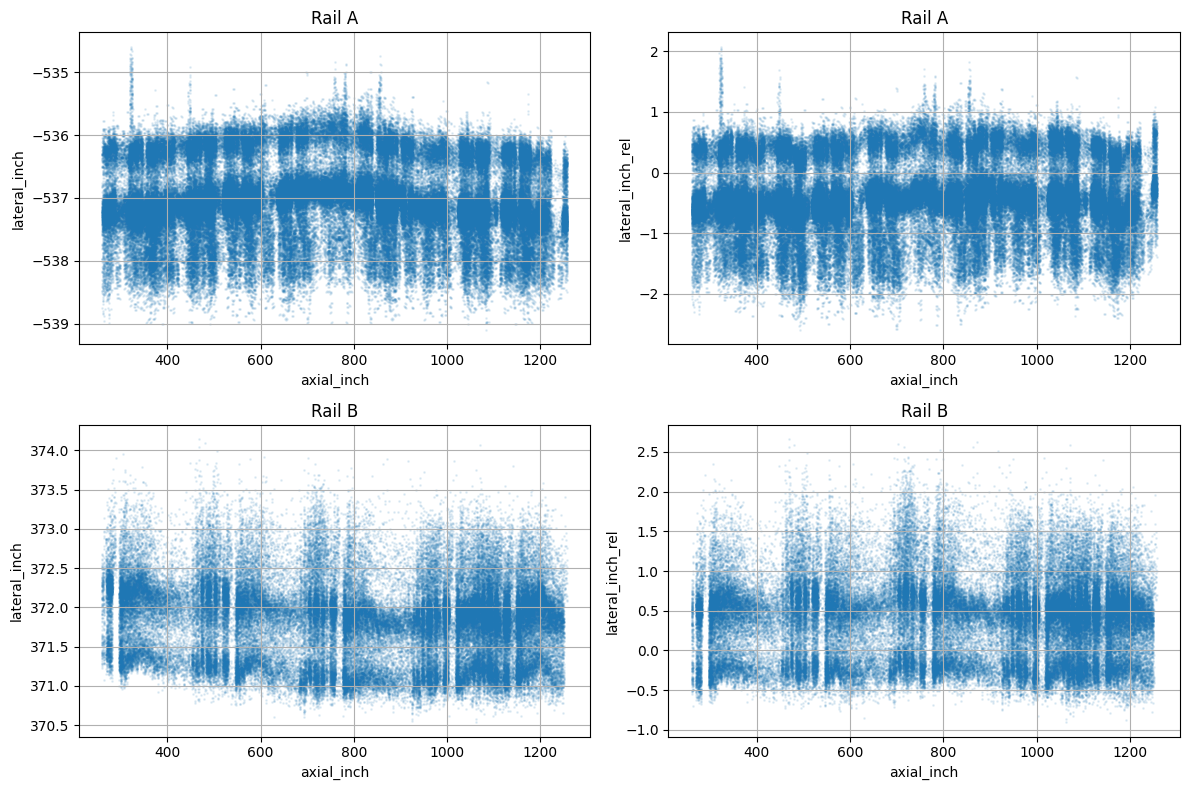

In [467]:
rail_profiles_scatter_plot(df, x1='axial_inch', y1='lateral_inch', x2='axial_inch', y2='lateral_inch_rel')

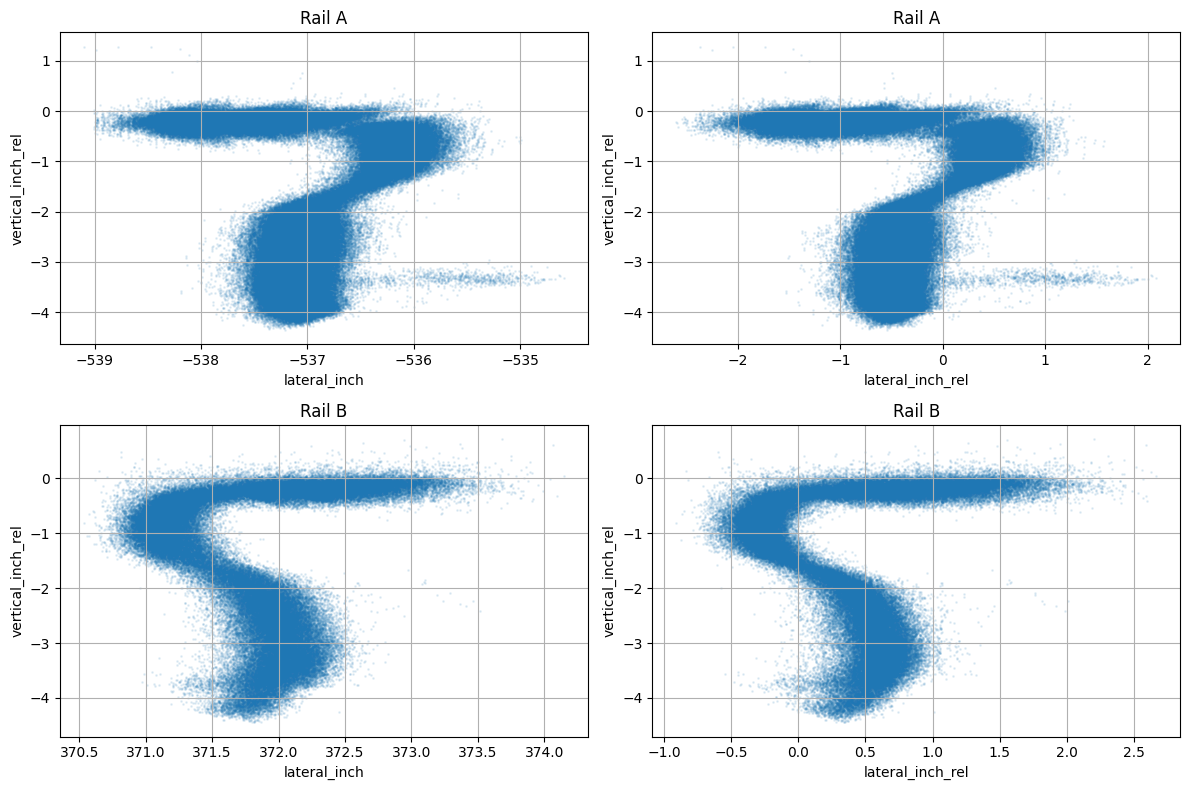

In [468]:
rail_profiles_scatter_plot(df, x1='lateral_inch', y1='vertical_inch_rel', x2='lateral_inch_rel', y2='vertical_inch_rel')

In [469]:

def duplicate_shift(df, shift_in=1.0, axial_col='axial_inch'):
    """
    Duplicate all rows, shift axial by shift_in, and flag as synthetic.
    """
    dup = df.copy()
    dup[axial_col] = dup[axial_col] + shift_in
    dup['is_synth'] = 1
    return pd.concat([df, dup], ignore_index=True)

# Example usage:
df_aug = duplicate_shift(df, shift_in=6.0)


In [470]:
df_aug

Intensity  Original_cloud_index       PCV  Classification    lateral  \
0               4                     0  0.648305             NaN  30.969601   
1               8                     0  0.533898             NaN  30.971278   
2               6                     0  0.504237             NaN  30.984129   
3              11                     0  0.572034             NaN  30.983353   
4              12                     0  0.885593             NaN  30.902538   
...           ...                   ...       ...             ...        ...   
769209          3                     2  0.889831             NaN -44.816390   
769210          7                     2  0.957627             NaN -44.818952   
769211          8                     2  0.906780             NaN -44.825701   
769212          1                     2  0.911017             NaN -44.799569   
769213          8                     2  0.970339             NaN -44.822153   

             axial  vertical  lateral_inch   axial_inch  vertical_inch  \
0        73.969852  0.207422    371.635216   887.638218       2.489062   
1        72.980139  0.114840    371.655341   875.761669       1.378078   
2        73.394396  0.174534    371.809543   880.732753       2.094413   
3        73.987505  0.076702    371.800232   887.850054       0.920427   
4        73.039362  0.325916    370.830450   876.472344       3.910989   
...            ...       ...           ...          ...            ...   
769209  101.593367  0.526926   -537.796676  1225.120403       6.323110   
769210  102.850671  0.520461   -537.827426  1240.208056       6.245534   
769211  101.852361  0.523527   -537.908414  1228.228330       6.282330   
769212  101.856541  0.520309   -537.594827  1228.278491       6.243713   
769213  102.939237  0.522580   -537.865836  1241.270840       6.270962   

        lateral_inch_round  axial_inch_round  vertical_inch_round  is_rail_a  \
0                 371.6250          887.6250               2.5000          0   
1                 371.6250          875.7500               1.3750          0   
2                 371.8125          880.7500               2.1250          0   
3                 371.8125          887.8750               0.9375          0   
4                 370.8125          876.5000               3.9375          0   
...                    ...               ...                  ...        ...   
769209           -537.8125         1219.1250               6.3125          1   
769210           -537.8125         1234.1875               6.2500          1   
769211           -537.9375         1222.2500               6.3125          1   
769212           -537.6250         1222.2500               6.2500          1   
769213           -537.8750         1235.2500               6.2500          1   

        is_rail_b  vertical_inch_rel  lateral_inch_rel  is_synth  
0               1          -1.636106          0.358831       NaN  
1               1          -2.724316          0.387008       NaN  
2               1          -2.016024          0.541040       NaN  
3               1          -3.205152          0.523372       NaN  
4               1          -0.192049         -0.437883       NaN  
...           ...                ...               ...       ...  
769209          0          -0.281820         -1.043377       1.0  
769210          0          -0.330203         -0.944458       1.0  
769211          0          -0.322600         -1.151885       1.0  
769212          0          -0.361216         -0.838298       1.0  
769213          0          -0.304004         -0.972244       1.0  

[769214 rows x 18 columns]

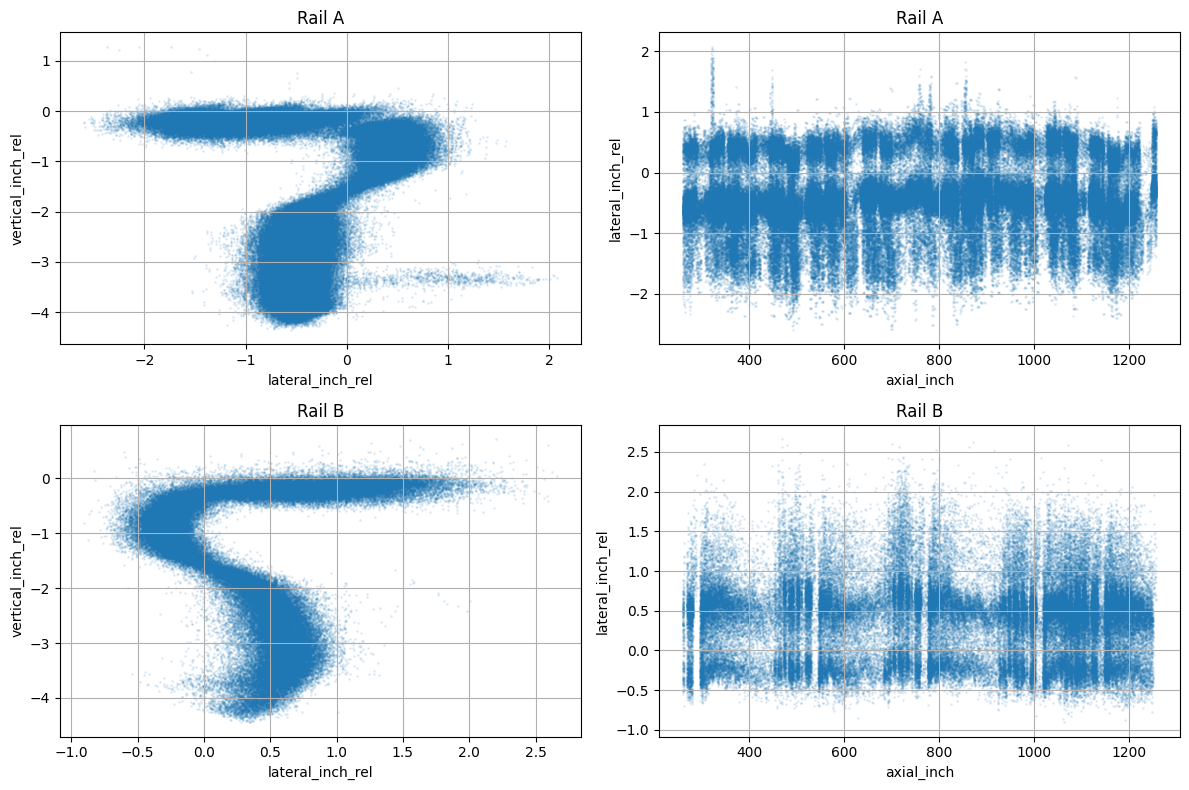

In [471]:
rail_profiles_scatter_plot(df, x1='lateral_inch_rel', y1='vertical_inch_rel', x2='axial_inch', y2='lateral_inch_rel')

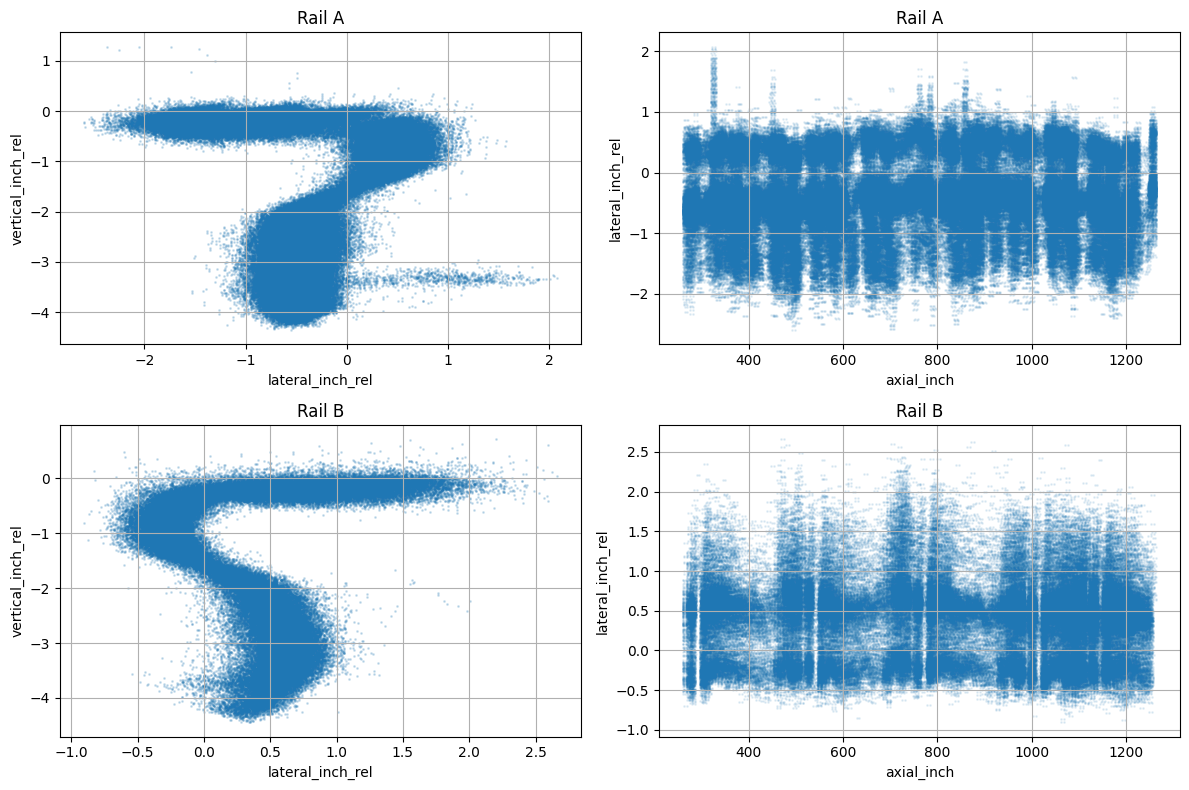

In [472]:
rail_profiles_scatter_plot(df_aug, x1='lateral_inch_rel', y1='vertical_inch_rel', x2='axial_inch', y2='lateral_inch_rel')

In [473]:
df = df_aug

In [474]:
df.rename(columns={'vertical_inch_rel': 'relative_vertical_inch'}, inplace=True)
df.rename(columns={'lateral_inch_rel': 'relative_lateral_inch'}, inplace=True)

In [475]:
df

Intensity  Original_cloud_index       PCV  Classification    lateral  \
0               4                     0  0.648305             NaN  30.969601   
1               8                     0  0.533898             NaN  30.971278   
2               6                     0  0.504237             NaN  30.984129   
3              11                     0  0.572034             NaN  30.983353   
4              12                     0  0.885593             NaN  30.902538   
...           ...                   ...       ...             ...        ...   
769209          3                     2  0.889831             NaN -44.816390   
769210          7                     2  0.957627             NaN -44.818952   
769211          8                     2  0.906780             NaN -44.825701   
769212          1                     2  0.911017             NaN -44.799569   
769213          8                     2  0.970339             NaN -44.822153   

             axial  vertical  lateral_inch   axial_inch  vertical_inch  \
0        73.969852  0.207422    371.635216   887.638218       2.489062   
1        72.980139  0.114840    371.655341   875.761669       1.378078   
2        73.394396  0.174534    371.809543   880.732753       2.094413   
3        73.987505  0.076702    371.800232   887.850054       0.920427   
4        73.039362  0.325916    370.830450   876.472344       3.910989   
...            ...       ...           ...          ...            ...   
769209  101.593367  0.526926   -537.796676  1225.120403       6.323110   
769210  102.850671  0.520461   -537.827426  1240.208056       6.245534   
769211  101.852361  0.523527   -537.908414  1228.228330       6.282330   
769212  101.856541  0.520309   -537.594827  1228.278491       6.243713   
769213  102.939237  0.522580   -537.865836  1241.270840       6.270962   

        lateral_inch_round  axial_inch_round  vertical_inch_round  is_rail_a  \
0                 371.6250          887.6250               2.5000          0   
1                 371.6250          875.7500               1.3750          0   
2                 371.8125          880.7500               2.1250          0   
3                 371.8125          887.8750               0.9375          0   
4                 370.8125          876.5000               3.9375          0   
...                    ...               ...                  ...        ...   
769209           -537.8125         1219.1250               6.3125          1   
769210           -537.8125         1234.1875               6.2500          1   
769211           -537.9375         1222.2500               6.3125          1   
769212           -537.6250         1222.2500               6.2500          1   
769213           -537.8750         1235.2500               6.2500          1   

        is_rail_b  relative_vertical_inch  relative_lateral_inch  is_synth  
0               1               -1.636106               0.358831       NaN  
1               1               -2.724316               0.387008       NaN  
2               1               -2.016024               0.541040       NaN  
3               1               -3.205152               0.523372       NaN  
4               1               -0.192049              -0.437883       NaN  
...           ...                     ...                    ...       ...  
769209          0               -0.281820              -1.043377       1.0  
769210          0               -0.330203              -0.944458       1.0  
769211          0               -0.322600              -1.151885       1.0  
769212          0               -0.361216              -0.838298       1.0  
769213          0               -0.304004              -0.972244       1.0  

[769214 rows x 18 columns]

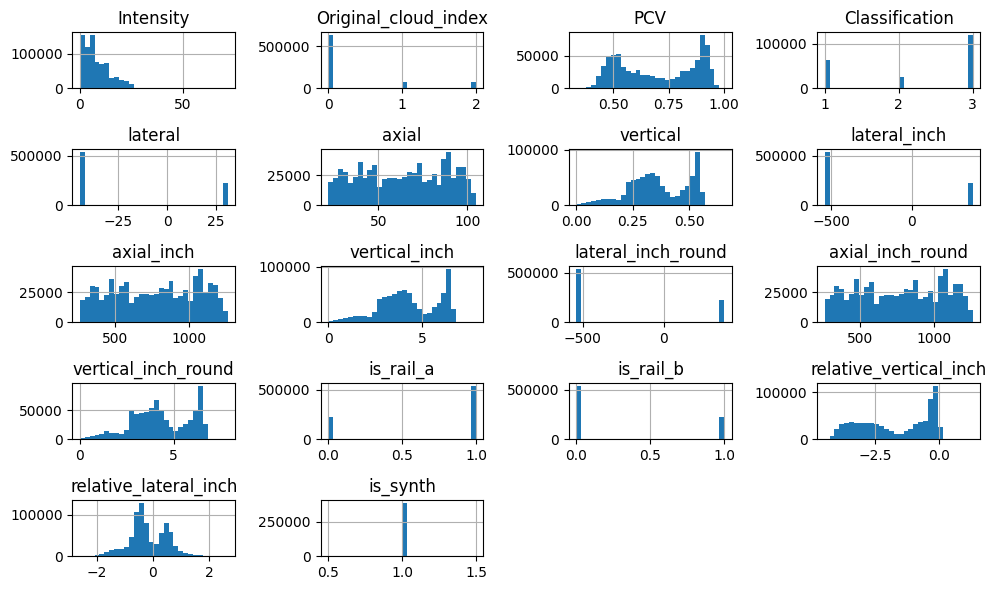

In [476]:
# Histograms for each column
df.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [477]:
df.describe()

Intensity  Original_cloud_index            PCV  Classification  \
count  769214.000000         769214.000000  769214.000000   209002.000000   
mean        8.069250              0.271833       0.701806        2.266074   
std         6.295072              0.616582       0.175893        0.898528   
min         0.000000              0.000000       0.334746        1.000000   
25%         3.000000              0.000000       0.525424        1.000000   
50%         7.000000              0.000000       0.694915        3.000000   
75%        12.000000              0.000000       0.885593        3.000000   
max        72.000000              2.000000       1.000000        3.000000   

             lateral          axial       vertical   lateral_inch  \
count  769214.000000  769214.000000  769214.000000  769214.000000   
mean      -22.089924      63.743903       0.357714    -265.079090   
std        34.682066      23.641162       0.130723     416.184793   
min       -44.925005      21.685846       0.000000    -539.100056   
25%       -44.766897      42.756992       0.266867    -537.202770   
50%       -44.735565      65.090824       0.345267    -536.826782   
75%        30.935863      86.049213       0.488327     371.230355   
max        31.178737     104.792800       0.654076     374.144844   

          axial_inch  vertical_inch  lateral_inch_round  axial_inch_round  \
count  769214.000000  769214.000000       769214.000000     769214.000000   
mean      767.926837       4.292572         -265.079169        764.926868   
std       283.709800       1.568671          416.184849        283.693943   
min       260.230147       0.000000         -539.125000        260.250000   
25%       516.712691       3.202405         -537.187500        513.062500   
50%       784.424033       4.143208         -536.812500        781.062500   
75%      1035.545778       5.859929          371.250000       1032.562500   
max      1263.513605       7.848909          374.125000       1257.500000   

       vertical_inch_round      is_rail_a      is_rail_b  \
count        769214.000000  769214.000000  769214.000000   
mean              4.292601       0.700775       0.299225   
std               1.568765       0.457919       0.457919   
min               0.000000       0.000000       0.000000   
25%               3.187500       0.000000       0.000000   
50%               4.125000       1.000000       0.000000   
75%               5.875000       1.000000       1.000000   
max               7.875000       1.000000       1.000000   

       relative_vertical_inch  relative_lateral_inch  is_synth  
count           769214.000000          769214.000000  384607.0  
mean                -1.711971              -0.173881       1.0  
std                  1.350679               0.671781       0.0  
min                 -4.446544              -2.600929       1.0  
25%                 -2.966308              -0.569225       1.0  
50%                 -1.558085              -0.299249       1.0  
75%                 -0.336211               0.390402       1.0  
max                  1.287359               2.663073       1.0

In [478]:
df.to_csv('data/df_processed.csv', index=False)

In [479]:

import os
os.environ["CLOUDCOMPARE_BIN"] = r"C:\Program Files\CloudCompare\CloudCompare.exe"
